# Evaluating models

In [1]:
from keras.datasets import mnist
from keras.utils import to_categorical

from keras import models
from keras import layers

import numpy as np
import matplotlib.pyplot as plt


from numpy.random import seed
from tensorflow import set_random_seed

Using TensorFlow backend.


In [2]:
seed(1)
set_random_seed(2)

### load data

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

### transform data

In [4]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [5]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

### build the NN

In [6]:
def get_model():    
    network = models.Sequential()
    network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
    network.add(layers.Dense(10, activation='softmax'))
    
    network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return network

### hold-out validation

In [7]:
num_validation_samples = 10000

In [8]:
validation_data = train_images[:num_validation_samples]
partial_train_images = train_images[num_validation_samples:]

In [9]:
validation_labels = train_labels[:num_validation_samples]
partial_train_labels =  train_labels[num_validation_samples:]

# run model 1 (evaluate at the end)

In [10]:
model = get_model()

In [11]:
%%time
model.fit(partial_train_images, partial_train_labels, epochs=5, batch_size=128);

Epoch 1/5
50000/50000 [==============================] - 3s 59us/step - loss: 0.2826 - acc: 0.9173
Epoch 2/5
50000/50000 [==============================] - 3s 54us/step - loss: 0.1167 - acc: 0.9649
Epoch 3/5
50000/50000 [==============================] - 2s 50us/step - loss: 0.0760 - acc: 0.9778
Epoch 4/5
50000/50000 [==============================] - 3s 50us/step - loss: 0.0557 - acc: 0.9828
Epoch 5/5
50000/50000 [==============================] - 2s 42us/step - loss: 0.0411 - acc: 0.9880
CPU times: user 33.4 s, sys: 20.4 s, total: 53.8 s
Wall time: 12.8 s


In [12]:
validation_score = model.evaluate(validation_data, validation_labels)

10000/10000 [==============================] - 0s 33us/step


In [13]:
validation_score

[0.09286422666236759, 0.9715]

# run model 2 (evaluate during training)

In [14]:
model = get_model()

In [15]:
%%time
history = model.fit(partial_train_images, partial_train_labels, epochs=8, batch_size=512, 
          validation_data=(validation_data, validation_labels));

Train on 50000 samples, validate on 10000 samples
Epoch 1/8
50000/50000 [==============================] - 1s 30us/step - loss: 0.4323 - acc: 0.8764 - val_loss: 0.2347 - val_acc: 0.9342
Epoch 2/8
50000/50000 [==============================] - 1s 26us/step - loss: 0.1967 - acc: 0.9425 - val_loss: 0.1672 - val_acc: 0.9522
Epoch 3/8
50000/50000 [==============================] - 1s 22us/step - loss: 0.1361 - acc: 0.9616 - val_loss: 0.1333 - val_acc: 0.9625
Epoch 4/8
50000/50000 [==============================] - 1s 25us/step - loss: 0.1023 - acc: 0.9706 - val_loss: 0.1189 - val_acc: 0.9662
Epoch 5/8
50000/50000 [==============================] - 1s 25us/step - loss: 0.0816 - acc: 0.9761 - val_loss: 0.1091 - val_acc: 0.9674
Epoch 6/8
50000/50000 [==============================] - 1s 17us/step - loss: 0.0648 - acc: 0.9815 - val_loss: 0.0916 - val_acc: 0.9729
Epoch 7/8
50000/50000 [==============================] - 1s 17us/step - loss: 0.0532 - acc: 0.9846 - val_loss: 0.0862 - val_acc: 0.975

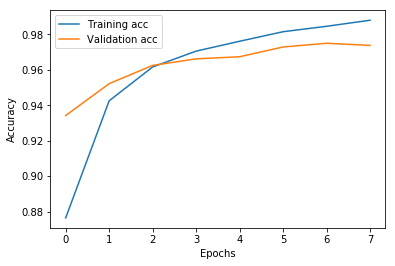

In [16]:
xx = history.epoch
yy2 = history.history['val_acc']
yy1 = history.history['acc']

plt.plot(xx,yy1, label='Training acc')
plt.plot(xx,yy2, label='Validation acc')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend()

plt.show()

### After having tuned hyperparameters fit again the model with all data

In [17]:
model = get_model()

In [18]:
model.fit(train_images, train_labels, epochs=3, batch_size=512);

Epoch 1/3
60000/60000 [==============================] - 1s 19us/step - loss: 0.3961 - acc: 0.8867
Epoch 2/3
60000/60000 [==============================] - 1s 16us/step - loss: 0.1764 - acc: 0.9488
Epoch 3/3
60000/60000 [==============================] - 1s 16us/step - loss: 0.1218 - acc: 0.9644


### at the end, score on the test data

In [19]:
test_score = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 31us/step


In [20]:
test_score

[0.13766392830684782, 0.9614]